<a href="https://colab.research.google.com/github/carazablan/C964-Computer-Science-Capstone/blob/main/Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unzip Zip Files

In [ ]:
!python --version

Python 3.10.6


In [ ]:
!unzip data.zip
!unzip runs.zip
!unzip test.zip

Archive:  data.zip
   creating: data/train/
   creating: data/train/BARN OWL/
  inflating: data/train/BARN OWL/001.jpg  
  inflating: data/train/BARN OWL/002.jpg  
  inflating: data/train/BARN OWL/003.jpg  
  inflating: data/train/BARN OWL/004.jpg  
  inflating: data/train/BARN OWL/005.jpg  
  inflating: data/train/BARN OWL/006.jpg  
  inflating: data/train/BARN OWL/007.jpg  
  inflating: data/train/BARN OWL/008.jpg  
  inflating: data/train/BARN OWL/009.jpg  
  inflating: data/train/BARN OWL/010.jpg  
  inflating: data/train/BARN OWL/011.jpg  
  inflating: data/train/BARN OWL/012.jpg  
  inflating: data/train/BARN OWL/013.jpg  
  inflating: data/train/BARN OWL/014.jpg  
  inflating: data/train/BARN OWL/015.jpg  
  inflating: data/train/BARN OWL/016.jpg  
  inflating: data/train/BARN OWL/017.jpg  
  inflating: data/train/BARN OWL/018.jpg  
  inflating: data/train/BARN OWL/019.jpg  
  inflating: data/train/BARN OWL/020.jpg  
  inflating: data/train/BARN OWL/021.jpg  
  inflating: data/t

## Install Ultralytics

In [ ]:
%pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.0/608.0 kB 8.4 MB/s eta 0:00:00


## Imports

In [ ]:
import ultralytics
ultralytics.checks()
from ultralytics import YOLO

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

Ultralytics YOLOv8.0.142 🚀 Python-3.10.6 torch-2.0.1+cu118 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.4/107.7 GB disk)


# Visualizations

In [ ]:
# results csv
results = pd.read_csv("/content/runs/classify/train4/results.csv")
results

,epoch,train/loss,metrics/accuracy_top1,metrics/accuracy_top5,val/loss,lr/pg0,lr/pg1,lr/pg2
0,0,0.32033,1,1,0.45100,0.000233,0.000233,0.000233
1,1,0.10442,1,1,0.36817,0.000316,0.000316,0.000316
2,2,0.05049,1,1,0.36000,0.000241,0.000241,0.000241


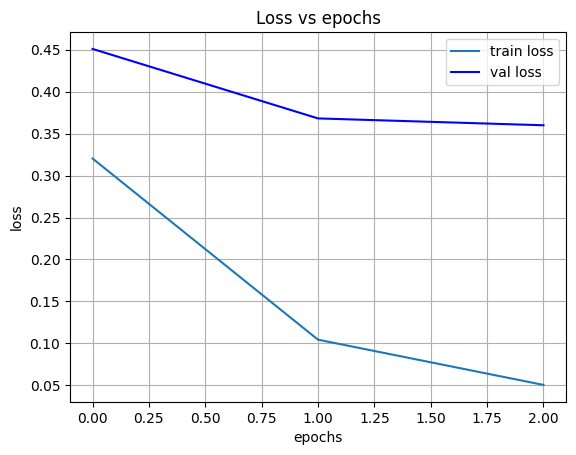

In [ ]:
# loss vs epochs
plt.figure()
plt.plot(results['                  epoch'], results['             train/loss'], label='train loss')
plt.plot(results['                  epoch'], results['               val/loss'], label='val loss', c='blue')
plt.grid()
plt.title('Loss vs epochs')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend();

Text(0.5, 0, 'epochs')

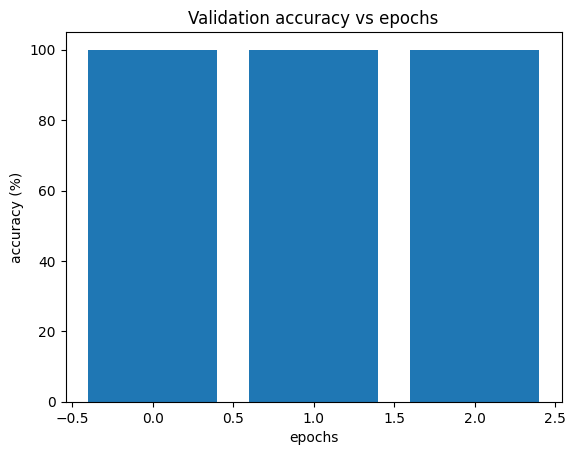

In [ ]:
# validation accuracy
plt.figure()
plt.bar(results['                  epoch'], results['  metrics/accuracy_top1'] * 100)
plt.title('Validation accuracy vs epochs')
plt.ylabel('accuracy (%)')
plt.xlabel('epochs')

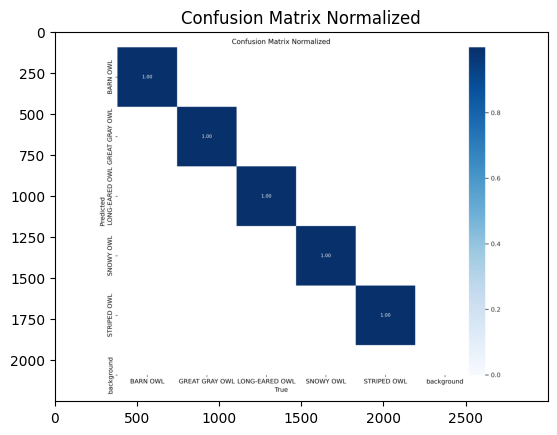

In [ ]:
# normalized confusion matrix
img = plt.imread('/content/runs/classify/train4/confusion_matrix_normalized.png')
plt.title('Confusion Matrix Normalized')
plt.imshow(img);

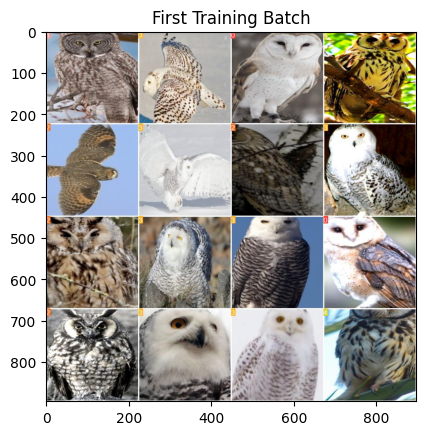

In [ ]:
# first training batch
img_1 = plt.imread('/content/runs/classify/train4/train_batch0.jpg')
plt.title('First Training Batch')
plt.imshow(img_1);

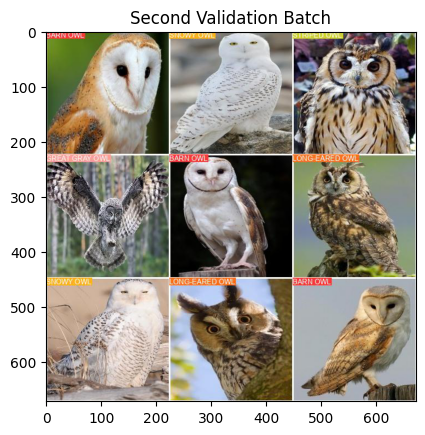

In [ ]:
# second validation batch
img_2 = plt.imread('/content/runs/classify/val/val_batch1_pred.jpg')
plt.title('Second Validation Batch')
plt.imshow(img_2);

# Owl Classifier

In [ ]:
# custom model trained from YOLOv8n-cls
model = YOLO('/content/runs/classify/train4/weights/last.pt')

# user interface
while True:
  user_input = input("Enter image file path or type 'Q' to quit: ")
  if user_input == 'Q' or user_input == 'q':
    break
  else:
    try:
      if user_input.lower().endswith(('.png', '.jpg', '.jpeg')):
        user_result = model(user_input) # predict on image
        probs = user_result[0].probs
        result_dict = user_result[0].names
        print("\nResult:", result_dict[probs.top1], "\n")
      else:
        print("\nPlease enter a valid image file path (ending in: .png, .jpg, or jpeg)\n")
    except IOError:
      print("Error")


Enter image file path or type 'Q' to quit: /content/test/BARN OWL/3.jpg



image 1/1 /content/test/BARN OWL/3.jpg: 224x224 BARN OWL 0.99, SNOWY OWL 0.00, STRIPED OWL 0.00, GREAT GRAY OWL 0.00, LONG-EARED OWL 0.00, 113.9ms
Speed: 19.6ms preprocess, 113.9ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)



Result: BARN OWL 

Enter image file path or type 'Q' to quit: q
